## Importing the libraries

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import statsmodels.formula.api as smf
from statsmodels.graphics.regressionplots import influence_plot
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

## Loading dataset

In [2]:
df_1=pd.read_csv('50_Startups.csv')
df_1.head()

,R&D Spend,Administration,Marketing Spend,State,Profit
0,165349.20,136897.80,471784.10,New York,192261.83
1,162597.70,151377.59,443898.53,California,191792.06
2,153441.51,101145.55,407934.54,Florida,191050.39
3,144372.41,118671.85,383199.62,New York,182901.99
4,142107.34,91391.77,366168.42,Florida,166187.94


### Data insights

In [3]:
df_1.describe()

,R&D Spend,Administration,Marketing Spend,Profit
count,50.000000,50.000000,50.000000,50.000000
mean,73721.615600,121344.639600,211025.097800,112012.639200
std,45902.256482,28017.802755,122290.310726,40306.180338
min,0.000000,51283.140000,0.000000,14681.400000
25%,39936.370000,103730.875000,129300.132500,90138.902500
50%,73051.080000,122699.795000,212716.240000,107978.190000
75%,101602.800000,144842.180000,299469.085000,139765.977500
max,165349.200000,182645.560000,471784.100000,192261.830000


In [4]:
df_1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   R&D Spend        50 non-null     float64
 1   Administration   50 non-null     float64
 2   Marketing Spend  50 non-null     float64
 3   State            50 non-null     object 
 4   Profit           50 non-null     float64
dtypes: float64(4), object(1)
memory usage: 2.1+ KB


In [5]:
df_1.isnull().sum()

R&D Spend          0
Administration     0
Marketing Spend    0
State              0
Profit             0
dtype: int64

#### No null value found the data

## Data Analysis

Text(0.5, 1.0, 'Profit')

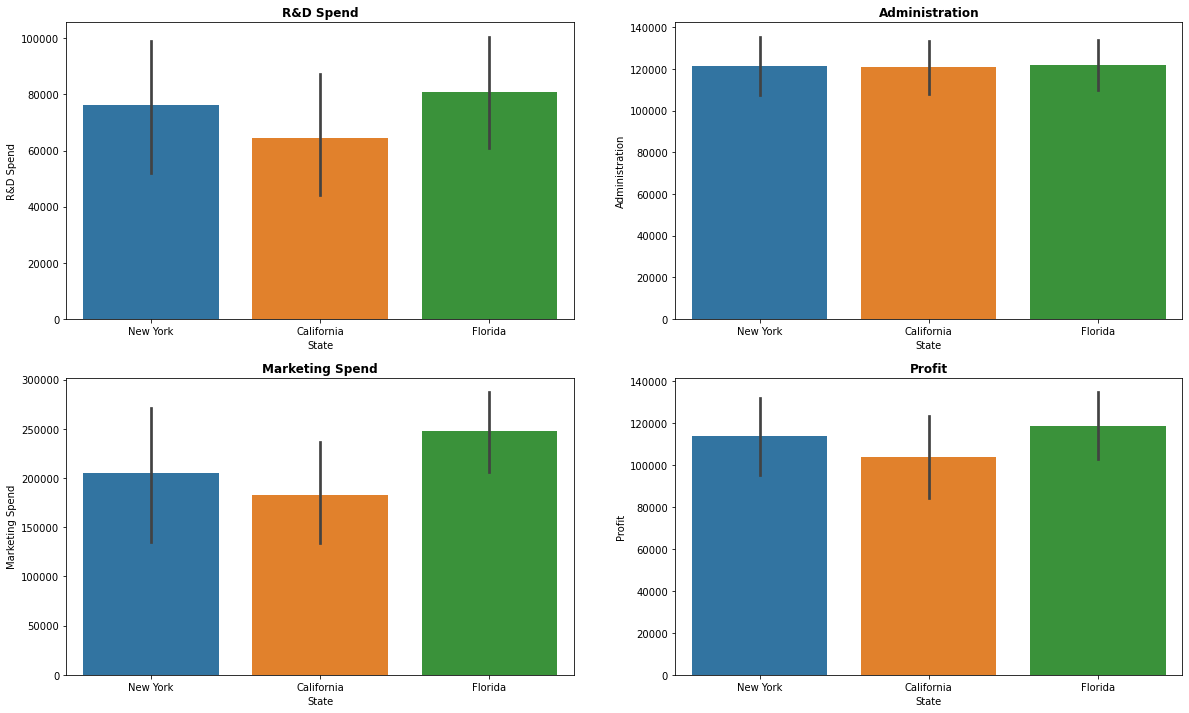

In [6]:
plt.figure(figsize=(20,12))
plt.subplot(2,2,1)
sns.barplot(x='State', y='R&D Spend', data=df_1)
plt.title('R&D Spend', fontweight='bold')

plt.subplot(2,2,2)
sns.barplot(x='State', y='Administration', data=df_1)
plt.title('Administration', fontweight='bold')

plt.subplot(2,2,3)
sns.barplot(x='State', y='Marketing Spend', data=df_1)
plt.title('Marketing Spend', fontweight='bold')

plt.subplot(2,2,4)
sns.barplot(x='State', y='Profit', data=df_1)
plt.title('Profit', fontweight='bold')


### Dist plot

* Dist plots are used to check the distribution of the data, peak value(the observation having the highest frequecy) and check for skewness in the data.

<AxesSubplot:xlabel='R&D Spend', ylabel='Density'>

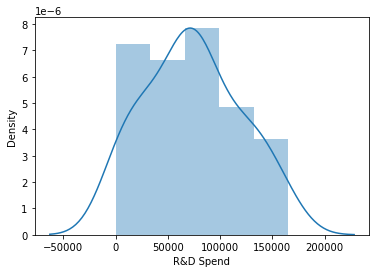

In [7]:
sns.distplot(df_1['R&D Spend'])

<AxesSubplot:xlabel='Administration', ylabel='Density'>

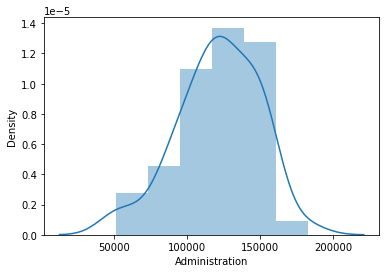

In [8]:
sns.distplot(df_1['Administration'])

<AxesSubplot:xlabel='Marketing Spend', ylabel='Density'>

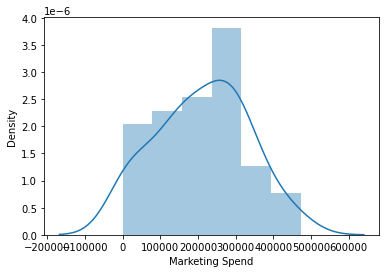

In [9]:
sns.distplot(df_1['Marketing Spend'])

<AxesSubplot:xlabel='Profit', ylabel='Density'>

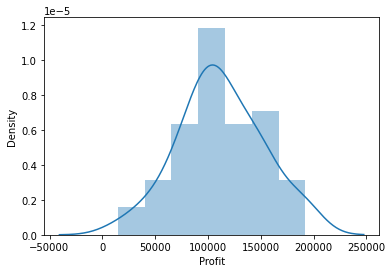

In [10]:
sns.distplot(df_1['Profit'])

#### From all above we can say that, data is Gaussian distributed.

<AxesSubplot:xlabel='R&D Spend'>

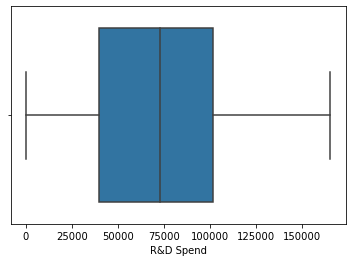

In [11]:
sns.boxplot(df_1['R&D Spend'])

<AxesSubplot:xlabel='Administration'>

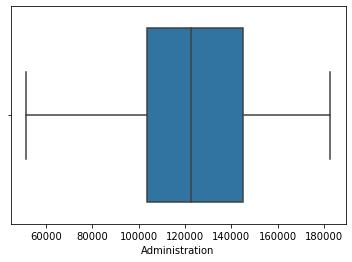

In [12]:
sns.boxplot(df_1['Administration'])

<AxesSubplot:xlabel='Marketing Spend'>

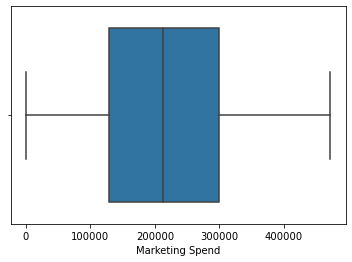

In [13]:
sns.boxplot(df_1['Marketing Spend'])

<AxesSubplot:xlabel='Profit'>

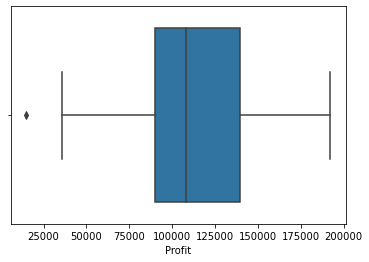

In [14]:
sns.boxplot(df_1['Profit'])

* There is an outliers in the Profit column. The value is less than 25,000 which means the company made once very less profit.

### Encoding State column

In [15]:
df_1=pd.get_dummies(df_1, columns=['State'], drop_first=True)
df_1.head()

,R&D Spend,Administration,Marketing Spend,Profit,State_Florida,State_New York
0,165349.20,136897.80,471784.10,192261.83,0,1
1,162597.70,151377.59,443898.53,191792.06,0,0
2,153441.51,101145.55,407934.54,191050.39,1,0
3,144372.41,118671.85,383199.62,182901.99,0,1
4,142107.34,91391.77,366168.42,166187.94,1,0


### Renaming Columns

In [16]:
df_1.rename(columns={'R&D Spend':'RnD', 'Marketing Spend':'Marketing', 'State_Florida':'Florida', 'State_New York':'NewYork'}, inplace=True)

### Finding Correlation between features

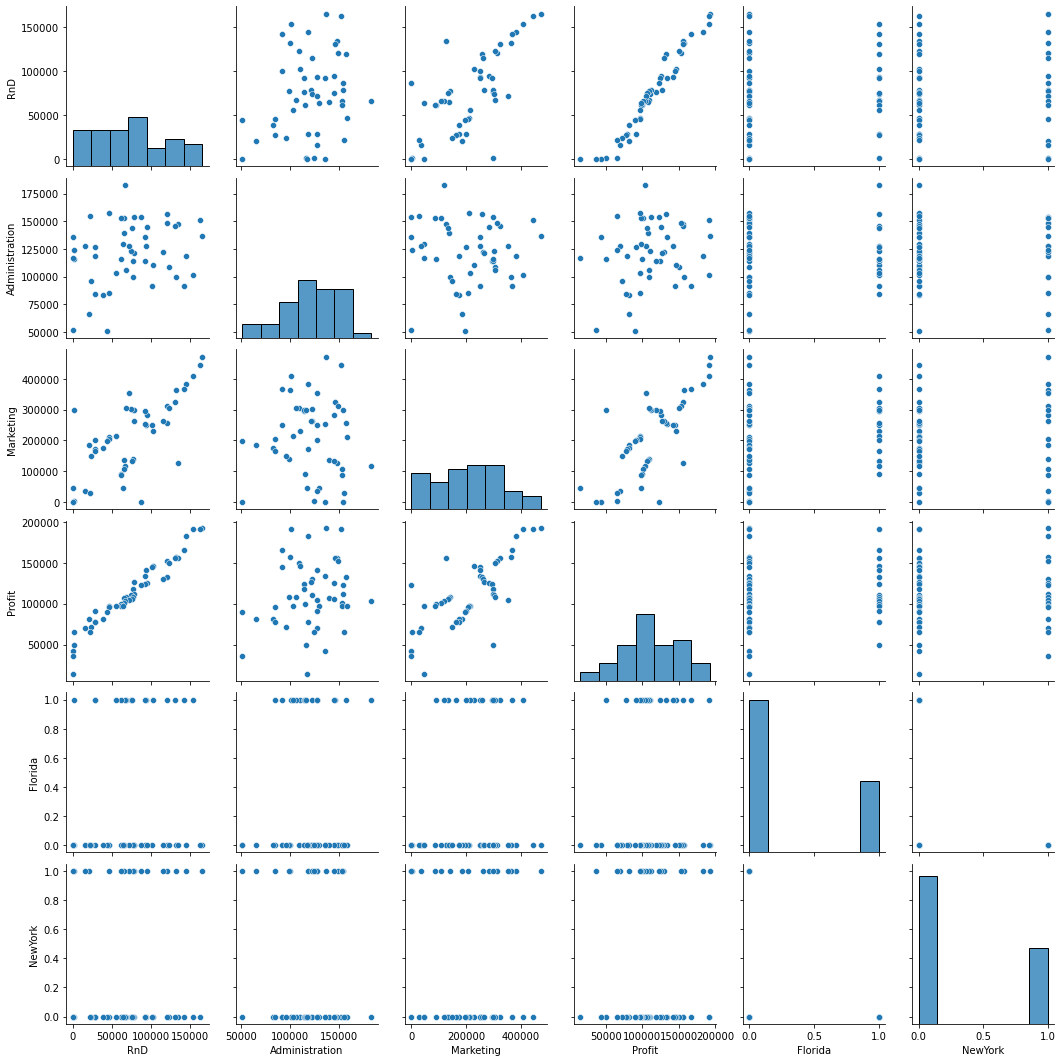

In [17]:
sns.pairplot(df_1)

In [18]:
df_1.corr()

,RnD,Administration,Marketing,Profit,Florida,NewYork
RnD,1.000000,0.241955,0.724248,0.972900,0.105711,0.039068
Administration,0.241955,1.000000,-0.032154,0.200717,0.010493,0.005145
Marketing,0.724248,-0.032154,1.000000,0.747766,0.205685,-0.033670
Profit,0.972900,0.200717,0.747766,1.000000,0.116244,0.031368
Florida,0.105711,0.010493,0.205685,0.116244,1.000000,-0.492366
NewYork,0.039068,0.005145,-0.033670,0.031368,-0.492366,1.000000


### Standardizing/Normalizing the data 

In [19]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
df_transf = scaler.fit_transform(df_1)
df_transf = pd.DataFrame(df_transf, columns=df_1.columns)
df_transf.head()

,RnD,Administration,Marketing,Profit,Florida,NewYork
0,1.000000,0.651744,1.000000,1.000000,0.0,1.0
1,0.983359,0.761972,0.940893,0.997355,0.0,0.0
2,0.927985,0.379579,0.864664,0.993178,1.0,0.0
3,0.873136,0.512998,0.812235,0.947292,0.0,1.0
4,0.859438,0.305328,0.776136,0.853171,1.0,0.0


## Building Model

In [20]:
model=smf.ols('Profit~RnD+Administration+Marketing+Florida+NewYork', data=df_transf).fit()

In [21]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Profit   R-squared:                       0.951
Model:                            OLS   Adj. R-squared:                  0.945
Method:                 Least Squares   F-statistic:                     169.9
Date:                Mon, 01 Nov 2021   Prob (F-statistic):           1.34e-27
Time:                        12:53:13   Log-Likelihood:                 78.976
No. Observations:                  50   AIC:                            -146.0
Df Residuals:                      44   BIC:                            -134.5
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
==================================================================================
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
Intercept          0.1918      0.026      7.300      0.000       0.139       0.245
RnD                0.7505      0.043     17.369      0.000       0.663       0.838
Administration    -0.0200      0.039     -0.517      0.608      -0.098       0.058
Marketing          0.0717      0.046      1.574      0.123      -0.020       0.163
Florida            0.0011      0.019      0.059      0.953      -0.037       0.039
NewYork           -0.0002      0.018     -0.013      0.990      -0.037       0.037
==============================================================================
Omnibus:                       14.782   Durbin-Watson:                   1.283
Prob(Omnibus):                  0.001   Jarque-Bera (JB):               21.266
Skew:                          -0.948   Prob(JB):                     2.41e-05
Kurtosis:                       5.572   Cond. No.                         11.7
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

* Probability values of three features is more than the standard significant value (0.05)

#### We will try to build different models.

In [22]:
model_RnD=smf.ols('Profit~RnD', data=df_transf).fit()
model_RnD.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Profit   R-squared:                       0.947
Model:                            OLS   Adj. R-squared:                  0.945
Method:                 Least Squares   F-statistic:                     849.8
Date:                Mon, 01 Nov 2021   Prob (F-statistic):           3.50e-32
Time:                        12:53:14   Log-Likelihood:                 76.922
No. Observations:                  50   AIC:                            -149.8
Df Residuals:                      48   BIC:                            -146.0
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      0.1934      0.014     13.535      0.000       0.165       0.222
RnD            0.7955      0.027     29.151      0.000       0.741       0.850
==============================================================================
Omnibus:                       13.727   Durbin-Watson:                   1.116
Prob(Omnibus):                  0.001   Jarque-Bera (JB):               18.536
Skew:                          -0.911   Prob(JB):                     9.44e-05
Kurtosis:                       5.361   Cond. No.                         4.41
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

* We could see that the p-value for R&D Spend is 0 which is less than 0.05 and also the correlation value between Profit and R&D Spend is 0.97 so the Profit is actually dependent on R&D Spend.

In [23]:
model_ad=smf.ols('Profit~Administration', data=df_transf).fit()
model_ad.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Profit   R-squared:                       0.040
Model:                            OLS   Adj. R-squared:                  0.020
Method:                 Least Squares   F-statistic:                     2.015
Date:                Mon, 01 Nov 2021   Prob (F-statistic):              0.162
Time:                        12:53:14   Log-Likelihood:                 4.7321
No. Observations:                  50   AIC:                            -5.464
Df Residuals:                      48   BIC:                            -1.640
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==================================================================================
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
Intercept          0.4342      0.086      5.030      0.000       0.261       0.608
Administration     0.2136      0.150      1.419      0.162      -0.089       0.516
==============================================================================
Omnibus:                        0.126   Durbin-Watson:                   0.099
Prob(Omnibus):                  0.939   Jarque-Bera (JB):                0.110
Skew:                           0.093   Prob(JB):                        0.947
Kurtosis:                       2.866   Cond. No.                         6.13
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

* The p value is 0.162 which is greater than 0.05.
* We also saw correlation value between Profit and Administration is very less which is 0.2.
* We can say that the Administration variable is not important in predicting the Profit values.

In [24]:
model_mkt=smf.ols('Profit~Marketing', data=df_transf).fit()
model_mkt.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Profit   R-squared:                       0.559
Model:                            OLS   Adj. R-squared:                  0.550
Method:                 Least Squares   F-statistic:                     60.88
Date:                Mon, 01 Nov 2021   Prob (F-statistic):           4.38e-10
Time:                        12:53:14   Log-Likelihood:                 24.181
No. Observations:                  50   AIC:                            -44.36
Df Residuals:                      48   BIC:                            -40.54
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      0.2552      0.043      5.898      0.000       0.168       0.342
Marketing      0.6548      0.084      7.803      0.000       0.486       0.824
==============================================================================
Omnibus:                        4.420   Durbin-Watson:                   1.178
Prob(Omnibus):                  0.110   Jarque-Bera (JB):                3.882
Skew:                          -0.336   Prob(JB):                        0.144
Kurtosis:                       4.188   Cond. No.                         4.72
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

* We could see that the p-value for Marketing Spend is 0 which is less than 0.05 and also the correlation value between Profit and Marketing Spend is 0.75 so the Profit is actually dependent on Marketing Spend.

In [25]:
model_state=smf.ols('Profit~Florida+NewYork', data=df_transf).fit()
model_state.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Profit   R-squared:                       0.024
Model:                            OLS   Adj. R-squared:                 -0.018
Method:                 Least Squares   F-statistic:                    0.5748
Date:                Mon, 01 Nov 2021   Prob (F-statistic):              0.567
Time:                        12:53:14   Log-Likelihood:                 4.3082
No. Observations:                  50   AIC:                            -2.616
Df Residuals:                      47   BIC:                             3.120
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      0.5024      0.056      9.048      0.000       0.391       0.614
Florida        0.0837      0.080      1.050      0.299      -0.077       0.244
NewYork        0.0555      0.079      0.706      0.483      -0.103       0.213
==============================================================================
Omnibus:                        0.111   Durbin-Watson:                   0.081
Prob(Omnibus):                  0.946   Jarque-Bera (JB):                0.207
Skew:                           0.104   Prob(JB):                        0.902
Kurtosis:                       2.762   Cond. No.                         3.70
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

* We could see that the p-value for Florida & NewYork is (0.299 & 0.483) which is more than 0.05 and also the correlation value between Profit and Florida & Profit and NewYork is 0.12 and 0.03 respectively so the Profit is independent on Florida & NewYork. 

### From above all, we will finally build the model.

* Profit is more dependent on RnD and Marketing spends.

In [26]:
model_rm=smf.ols('Profit~RnD+Marketing', data=df_transf).fit()
model_rm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Profit   R-squared:                       0.950
Model:                            OLS   Adj. R-squared:                  0.948
Method:                 Least Squares   F-statistic:                     450.8
Date:                Mon, 01 Nov 2021   Prob (F-statistic):           2.16e-31
Time:                        12:53:15   Log-Likelihood:                 78.824
No. Observations:                  50   AIC:                            -151.6
Df Residuals:                      47   BIC:                            -145.9
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      0.1819      0.015     12.006      0.000       0.151       0.212
RnD            0.7417      0.038     19.266      0.000       0.664       0.819
Marketing      0.0795      0.041      1.927      0.060      -0.003       0.162
==============================================================================
Omnibus:                       14.677   Durbin-Watson:                   1.257
Prob(Omnibus):                  0.001   Jarque-Bera (JB):               21.161
Skew:                          -0.939   Prob(JB):                     2.54e-05
Kurtosis:                       5.575   Cond. No.                         8.61
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

##### Here, probability value for Marketing is 0.06 which is slightly greater than 0.05. So we will analyze & try to make it lesser than 0.05.

### Calculating VIF as well to check collinearity

In [27]:
rsq_rnd=smf.ols('RnD~Administration+Marketing+Florida+NewYork', data=df_transf).fit().rsquared
vif_rnd=1/(1-rsq_rnd)

rsq_ad=smf.ols('Administration~RnD+Marketing+Florida+NewYork', data=df_transf).fit().rsquared
vif_ad=1/(1-rsq_ad)

rsq_mkt=smf.ols('Marketing~RnD+Administration+Florida+NewYork', data=df_transf).fit().rsquared
vif_mkt=1/(1-rsq_mkt)

rsq_fl=smf.ols('Florida~RnD+Administration+Marketing+NewYork', data=df_transf).fit().rsquared
vif_fl=1/(1-rsq_fl)

rsq_ny=smf.ols('NewYork~RnD+Administration+Marketing+Florida', data=df_transf).fit().rsquared
vif_ny=1/(1-rsq_ny)

d1={'Features':['RnD', 'Administration', 'Marketing', 'Florida', 'NewYork'], 
    'VIF':[vif_rnd, vif_ad, vif_mkt, vif_fl, vif_ny]}
vif_frame=pd.DataFrame(d1)
vif_frame

,Features,VIF
0,RnD,2.495511
1,Administration,1.177766
2,Marketing,2.416797
3,Florida,1.387641
4,NewYork,1.335061


### Model validation using Residual analysis

#### Q-Q plot to check normality of errors

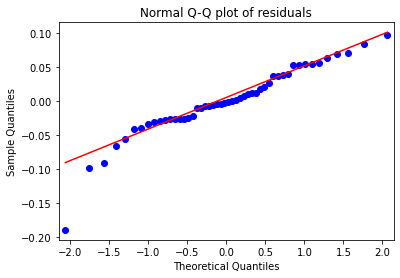

In [28]:
import statsmodels.api as sm
qqplot=sm.qqplot(model_rm.resid, line='q')
plt.title('Normal Q-Q plot of residuals')
plt.show()

In [29]:
list(np.where(model_rm.resid<-0.10))

[array([49], dtype=int64)]

* We can see most of the points are very close and on the line in the above plot. Although, there is a data point (observation no.49) that is very far away from the straight line and we will try to remove the influencer point with the help of Cook's distance, influence plot method later below.

#### Residual Plot for Homoscedasticity

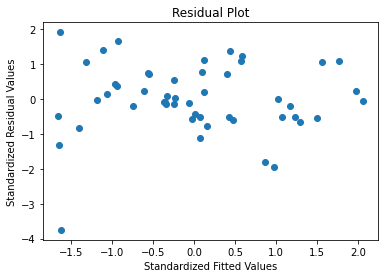

In [30]:
def get_standardized_values(vals):
    return (vals - vals.mean())/vals.std()

plt.scatter(get_standardized_values(model_rm.fittedvalues),
           get_standardized_values(model_rm.resid))
plt.title('Residual Plot')
plt.xlabel('Standardized Fitted Values')
plt.ylabel('Standardized Residual Values')
plt.show()

* There is no pattern in the Residual plot, so we can say there is a linear relation and no error variance.

#### Residuals vs Regressors

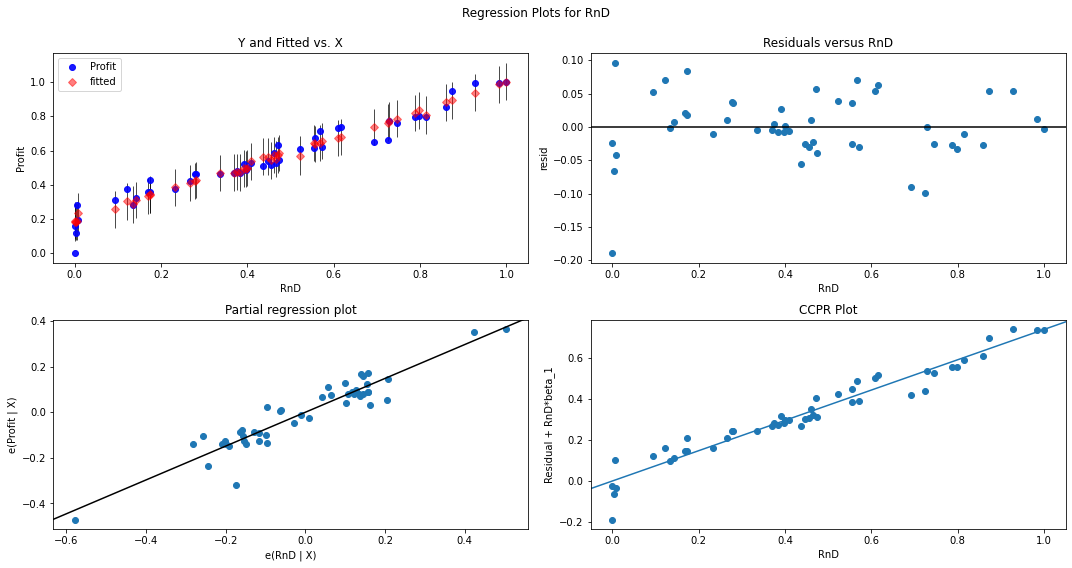

In [31]:
fig= plt.figure(figsize=(15,8))
fig=sm.graphics.plot_regress_exog(model_rm, 'RnD', fig=fig)
plt.show()

* There is no pattern in the Residual vs R & D Spend plot, so we can say there is a linear relation and no error variance.

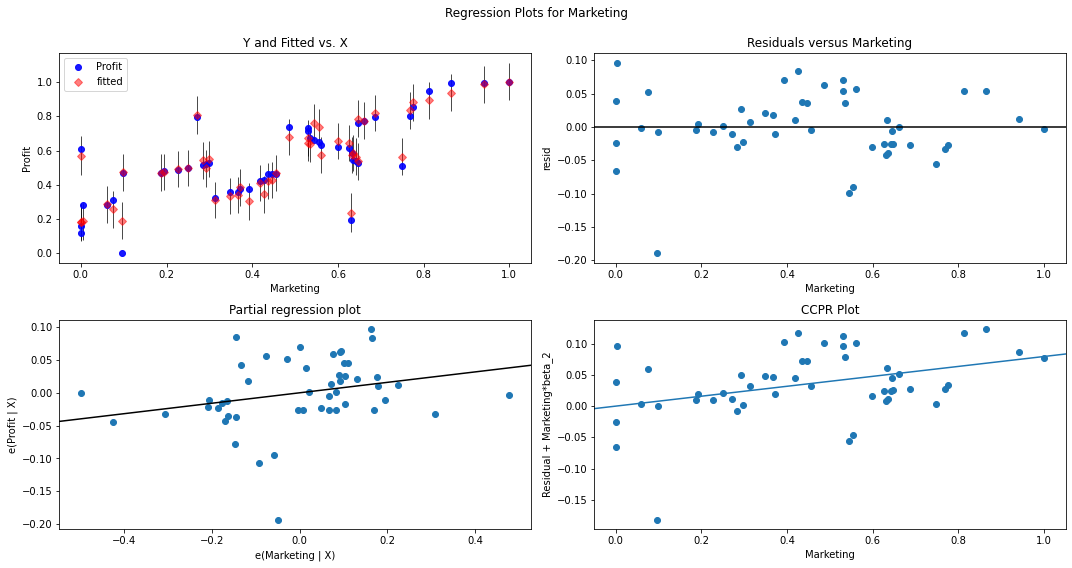

In [32]:
fig=plt.figure(figsize=(15,8))
fig=sm.graphics.plot_regress_exog(model_rm, 'Marketing', fig=fig)
plt.show()

* There is no pattern in the Residual vs Marketing Spend plot, so we can say there is a linear relation and no error variance

#### Detecting Influencers/Outliers using Cook's distance & influence plot

In [33]:
model_influence=model_rm.get_influence()
(c,_)= model_influence.cooks_distance

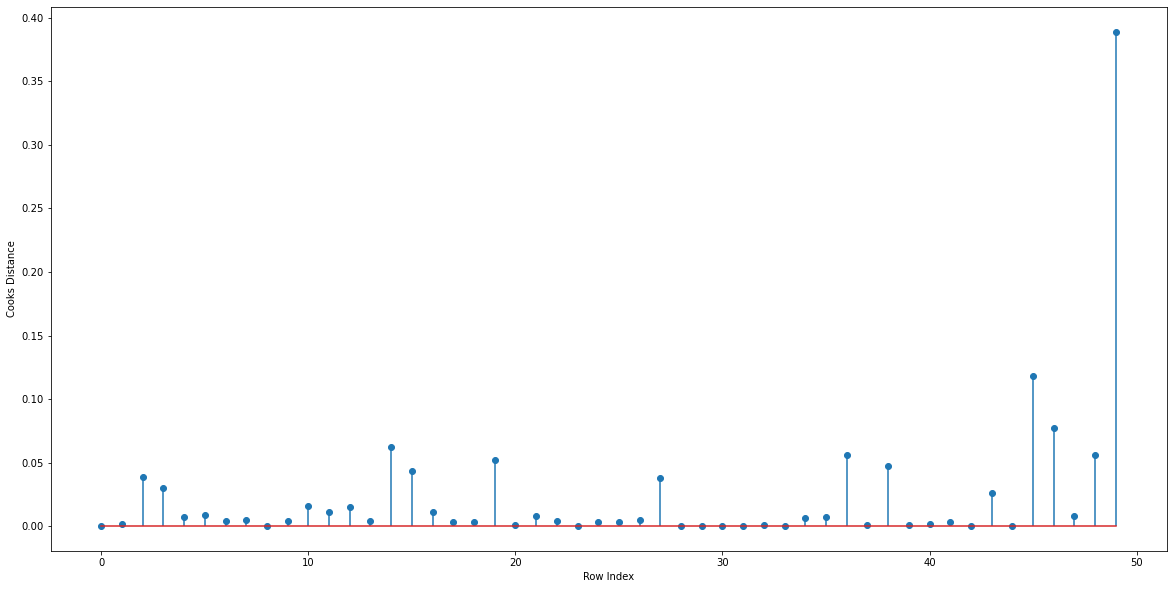

In [34]:
#Plot the influencers values using stem plot
fig=plt.subplots(figsize=(20,10))
plt.stem(np.arange(len(df_1)), np.round(c,3))
plt.xlabel('Row Index')
plt.ylabel('Cooks Distance')
plt.show()

In [35]:
(np.argmax(c), np.max(c))

(49, 0.389488622792492)

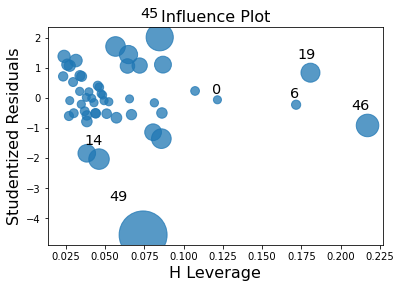

In [36]:
from statsmodels.graphics.regressionplots import influence_plot
influence_plot(model_rm)
plt.show()

* We can see that the 49th observation is an Influencer point and has more distance than other data points. We will delete this data point to further increase our accuracy.

### Improving the model

In [37]:
df_transf_1 = df_transf.drop(df_transf.index[[49]],axis=0).reset_index()
df_transf_1.head()

,index,RnD,Administration,Marketing,Profit,Florida,NewYork
0,0,1.000000,0.651744,1.000000,1.000000,0.0,1.0
1,1,0.983359,0.761972,0.940893,0.997355,0.0,0.0
2,2,0.927985,0.379579,0.864664,0.993178,1.0,0.0
3,3,0.873136,0.512998,0.812235,0.947292,0.0,1.0
4,4,0.859438,0.305328,0.776136,0.853171,1.0,0.0


In [38]:
df_transf_1 = df_transf_1.drop(['index'], axis=1)
df_transf_1.head()

,RnD,Administration,Marketing,Profit,Florida,NewYork
0,1.000000,0.651744,1.000000,1.000000,0.0,1.0
1,0.983359,0.761972,0.940893,0.997355,0.0,0.0
2,0.927985,0.379579,0.864664,0.993178,1.0,0.0
3,0.873136,0.512998,0.812235,0.947292,0.0,1.0
4,0.859438,0.305328,0.776136,0.853171,1.0,0.0


### Build the final model

In [39]:
model_final_I=smf.ols('Profit~RnD+Marketing', data=df_transf_1).fit()
model_final_I.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Profit   R-squared:                       0.961
Model:                            OLS   Adj. R-squared:                  0.959
Method:                 Least Squares   F-statistic:                     568.0
Date:                Mon, 01 Nov 2021   Prob (F-statistic):           3.74e-33
Time:                        12:53:37   Log-Likelihood:                 85.844
No. Observations:                  49   AIC:                            -165.7
Df Residuals:                      46   BIC:                            -160.0
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      0.1977      0.013     14.992      0.000       0.171       0.224
RnD            0.7220      0.033     22.136      0.000       0.656       0.788
Marketing      0.0729      0.035      2.104      0.041       0.003       0.143
==============================================================================
Omnibus:                        0.082   Durbin-Watson:                   1.546
Prob(Omnibus):                  0.960   Jarque-Bera (JB):                0.273
Skew:                          -0.051   Prob(JB):                        0.872
Kurtosis:                       2.649   Cond. No.                         8.57
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

#### The Adj. R-squared is approx 95.9% which  is very good. Also the p-values for all features is within the limit (<0.05). 
#### So we can say that the, model is best fitted.